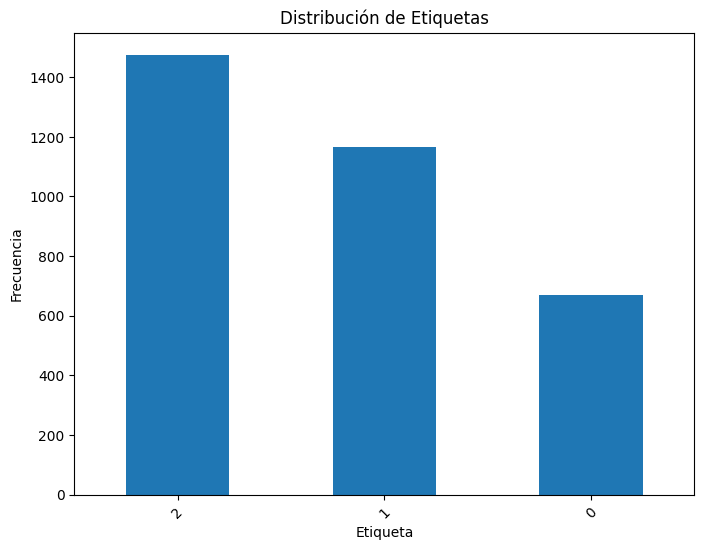

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos2.csv", header=None)

# Obtener las etiquetas (última columna del DataFrame)
labels = df.iloc[:, -1]

# Contar la frecuencia de cada etiqueta
label_counts = labels.value_counts()

# Graficar la distribución de las etiquetas
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Distribución de Etiquetas')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold

# Leer el dataset desde un archivo CSV
df = pd.read_csv("descriptores/descriptores_completos2.csv", header=None)

# Obtener características (X) y etiquetas (y) del DataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Declarar lr y momentum
lr = 0.001
momentum = 0.9

# Definir el número de características y clases
num_features = X.shape[1]
num_classes = len(np.unique(y))

# Construir y compilar el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_classes, activation= 'sigmoid', input_shape=(num_features,))
])

optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Validación cruzada
num_folds = 20

kf = KFold(n_splits=num_folds)

fold_accs = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Entrenar el modelo en este fold
    model.fit(X_train, y_train, epochs=10, verbose=0)

    # Evaluar el modelo en este fold
    _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
    fold_accs.append(fold_acc)

# Calcular la precisión promedio
mean_acc = np.mean(fold_accs)

print('Precisión promedio en validación cruzada:', mean_acc)


c:\Users\nanga\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precisión promedio en validación cruzada: 0.5863782413303852


In [60]:
num_features = X.shape[1]

for epocas in range(20, 100, 20):
    for c in range (3,15):
        i = 0.2
        while i < 1:
            j = 0.5
            while j < 1:
                
                model = tf.keras.Sequential([tf.keras.layers.Dense(c, activation= 'sigmoid', input_shape=(num_features,))])
                optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
                model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                num_folds = 20

                kf = KFold(n_splits=num_folds)

                fold_accs = []

                for train_index, val_index in kf.split(X):
                    X_train, X_val = X[train_index], X[val_index]
                    y_train, y_val = y[train_index], y[val_index]

                   
                    model.fit(X_train, y_train, epochs=epocas, verbose=0)
                    _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
                    fold_accs.append(fold_acc)
                mean_acc = np.mean(fold_accs)
                with open("resultados2.txt", "a") as file:
                    file.write(f"{epocas},{c}, {i}, {j}, {mean_acc}\n")
                print(epocas,c,i, j)
                
                j += 0.5
            i += 0.2
        c = c+ 1


20 3 0.2 0.5
20 3 0.4 0.5
20 3 0.6000000000000001 0.5
20 3 0.8 0.5
20 4 0.2 0.5
20 4 0.4 0.5
20 4 0.6000000000000001 0.5
20 4 0.8 0.5
20 5 0.2 0.5
20 5 0.4 0.5
20 5 0.6000000000000001 0.5
20 5 0.8 0.5
20 6 0.2 0.5
20 6 0.4 0.5
20 6 0.6000000000000001 0.5
20 6 0.8 0.5
20 7 0.2 0.5
20 7 0.4 0.5
20 7 0.6000000000000001 0.5
20 7 0.8 0.5
20 8 0.2 0.5
20 8 0.4 0.5
20 8 0.6000000000000001 0.5
20 8 0.8 0.5
20 9 0.2 0.5
20 9 0.4 0.5
20 9 0.6000000000000001 0.5
20 9 0.8 0.5
20 10 0.2 0.5
20 10 0.4 0.5
20 10 0.6000000000000001 0.5
20 10 0.8 0.5
20 11 0.2 0.5
20 11 0.4 0.5
20 11 0.6000000000000001 0.5
20 11 0.8 0.5
20 12 0.2 0.5
20 12 0.4 0.5
20 12 0.6000000000000001 0.5
20 12 0.8 0.5
20 13 0.2 0.5
20 13 0.4 0.5
20 13 0.6000000000000001 0.5
20 13 0.8 0.5
20 14 0.2 0.5
20 14 0.4 0.5
20 14 0.6000000000000001 0.5
20 14 0.8 0.5
40 3 0.2 0.5
40 3 0.4 0.5
40 3 0.6000000000000001 0.5
40 3 0.8 0.5
40 4 0.2 0.5
40 4 0.4 0.5
40 4 0.6000000000000001 0.5
40 4 0.8 0.5
40 5 0.2 0.5
40 5 0.4 0.5
40 5 0.600000000

In [63]:
num_features = X.shape[1]

for epocas in range(20, 120, 20):
    for c in range (15,16):
        i = 0.2
        while i < 1:
            j = 0.5
            while j < 1:
                
                model = tf.keras.Sequential([tf.keras.layers.Dense(c, activation= 'sigmoid', input_shape=(num_features,))])
                optimizer = tf.keras.optimizers.SGD(learning_rate=j, momentum=i)
                model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
                num_folds = 20

                kf = KFold(n_splits=num_folds)

                fold_accs = []

                for train_index, val_index in kf.split(X):
                    X_train, X_val = X[train_index], X[val_index]
                    y_train, y_val = y[train_index], y[val_index]

                   
                    model.fit(X_train, y_train, epochs=epocas, verbose=0)
                    _, fold_acc = model.evaluate(X_val, y_val, verbose=0)
                    fold_accs.append(fold_acc)
                mean_acc = np.mean(fold_accs)
                with open("resultados2_completo.txt", "a") as file:
                    file.write(f"{epocas},{c}, {i}, {j}, {mean_acc}\n")
                print(epocas,c,i, j)
                
                j += 0.5
            i += 0.2
        c = c+ 1


20 15 0.2 0.5
20 15 0.4 0.5
20 15 0.6000000000000001 0.5
20 15 0.8 0.5
40 15 0.2 0.5
40 15 0.4 0.5
40 15 0.6000000000000001 0.5
40 15 0.8 0.5
60 15 0.2 0.5
60 15 0.4 0.5
60 15 0.6000000000000001 0.5
60 15 0.8 0.5
80 15 0.2 0.5
80 15 0.4 0.5
80 15 0.6000000000000001 0.5
80 15 0.8 0.5
100 15 0.2 0.5
100 15 0.4 0.5
100 15 0.6000000000000001 0.5
100 15 0.8 0.5
